## Assignment for  Week 8 - Reinforcement Learning

### Q-Learning

**Objective:**
Reproduce the exercise explained in the following tutorial videos: <br>

* https://www.youtube.com/watch?v=yMk_XtIEzH8&list=PLQVvvaa0QuDezJFIOU5wDdfy4e9vdnx-7 <br>
* https://www.youtube.com/watch?v=Gq1Azv_B4-4 <br>
* https://www.youtube.com/watch?v=CBTbifYx6a8 <br>

These videos are accompanied by the following:.  
* [Q-Learning introduction and Q Table - Reinforcement Learning w/ Python Tutorial p.1](https://pythonprogramming.net/q-learning-reinforcement-learning-python-tutorial/) <br>
* [Q-Learning introduction and Q Table - Reinforcement Learning w/ Python Tutorial p.2](https://pythonprogramming.net/q-learning-algorithm-reinforcement-learning-python-tutorial/?completed=/q-learning-reinforcement-learning-python-tutorial/) <br>
* [Q-Learning introduction and Q Table - Reinforcement Learning w/ Python Tutorial p.3](https://pythonprogramming.net/q-learning-analysis-reinforcement-learning-python-tutorial/?completed=/q-learning-algorithm-reinforcement-learning-python-tutorial/) <br>

<div class="alert alert-block alert-danger">
<b>Important::</b> In working through the code listed on the webpages, there are a number of errors that prevent the demo from performing correctly.  The code shown in the videos is correct!
</div>

**NOTE:** You don't need to reproduce all of the graphs demostrated in the third video for this assignment. Please include 2 of the demonstrated graphs.

### Deliverables:

Upload your notebook's .ipynb file and a screenshot of your car reaching it's goal.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

# Reinforcement Learning

# Mountain car example 

We have solved the Mountain Car problem using Q-Learning, a popular reinforcement learning algorithm. 


**1. Problem Overview**

The Mountain Car problem is a classic reinforcement learning challenge where a car is stuck in a valley between two hills. The goal is to drive the car up the hill on the right side. However, the driver dont know the suitable velocity and position so that they can climb the hill in a single pass. 

Instead, the car must learn to build momentum by moving back and forth to eventually reach the goal.

**Key Components:**

State Space: The car's position and velocity.

Action Space: The car can push left, push right, or do nothing.

Reward: The car receives a reward of -1 for every time step until it reaches the goal.


**We use Q-Learning technique to solve this problem**

# Q - Learning

Q-Learning is a model-free reinforcement learning algorithm that learns the value of actions in specific states. It uses a Q-table to store the expected future rewards for each state-action pair. The algorithm updates the Q-values iteratively using the Bellman equation. 

Bellman equation is an approach, where the current state will get updated based on the action taken, learning rate and reward recieved due to the action. 

# Q- learning approach

1. Import required libraies 

2. Initialize the environment and Parameters

3. Helper function to discretize states (converting from continous to discretized)

4. Write the Q-learning algorithm with updating the q values in each episode. 


# Exploration vs. Exploitation

1. Exploration: The agent tries random actions to discover new states and rewards.

2. Exploitation: The agent chooses the best-known action based on the Q-table.

We use an epsilon-greedy strategy to balance exploration and exploitation. Initially, the agent explores more (high epsilon), but over time, it exploits more (epsilon decays).

In [1]:
# Step 1: Import libraries
import gymnasium as gym 
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Create the Mountain Car environment with rendering enabled
env = gym.make('MountainCar-v0', render_mode="human")

# Define Q-Learning parameters
LEARNING_RATE = 0.1  # Learning rate
DISCOUNT = 0.95  # Discount factor
EPISODES = 5000  # Increase the number of episodes
SHOW_EVERY = 500  # Render the environment every 500 episodes

# Exploration settings
epsilon = 1.0  # Initial exploration rate
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES // 2
epsilon_decay_value = epsilon / (END_EPSILON_DECAYING - START_EPSILON_DECAYING)

# Discretize the state space
DISCRETE_OS_SIZE = [40, 40]  # Increase the number of bins for better resolution
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / DISCRETE_OS_SIZE

# Initialize Q-table
q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

# Step 3: Helper function to discretize states
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(np.int32))

#Step 4: Q-learning algorithm

# For tracking rewards and epsilon
ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

for episode in range(EPISODES):
    episode_reward = 0
    # Reset the environment and extract the initial state
    initial_state, _ = env.reset()  # Extract the state from the tuple
    discrete_state = get_discrete_state(initial_state)
    terminated = False
    truncated = False

    while not (terminated or truncated):
        if episode % SHOW_EVERY == 0:
            env.render()

        # Choose action using epsilon-greedy strategy
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)

        # Take action and observe new state and reward
        new_state, reward, terminated, truncated, _ = env.step(action)
        new_discrete_state = get_discrete_state(new_state)
        episode_reward += reward

        # Update Q-table
        if not (terminated or truncated):
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_discrete_state

    # Decay epsilon
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value

    # Track rewards
    ep_rewards.append(episode_reward)
    if not episode % SHOW_EVERY:
        average_reward = sum(ep_rewards[-SHOW_EVERY:]) / SHOW_EVERY
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        print(f"Episode: {episode}, Avg: {average_reward}, Max: {max(ep_rewards[-SHOW_EVERY:])}, Min: {min(ep_rewards[-SHOW_EVERY:])}")

env.close()

Episode: 0, Avg: -0.4, Max: -200.0, Min: -200.0
Episode: 500, Avg: -200.0, Max: -200.0, Min: -200.0
Episode: 1000, Avg: -200.0, Max: -200.0, Min: -200.0
Episode: 1500, Avg: -200.0, Max: -200.0, Min: -200.0
Episode: 2000, Avg: -199.96, Max: -180.0, Min: -200.0
Episode: 2500, Avg: -199.986, Max: -193.0, Min: -200.0
Episode: 3000, Avg: -199.606, Max: -164.0, Min: -200.0
Episode: 3500, Avg: -198.92, Max: -158.0, Min: -200.0
Episode: 4000, Avg: -196.17, Max: -155.0, Min: -200.0
Episode: 4500, Avg: -194.03, Max: -149.0, Min: -200.0


# Q Learning approach

**1. Discretization**

The state space (position and velocity) is continuous, so we discretize it into bins to make the Q-table manageable. This reduces the computational complexity.


**2. Q-Table**

The Q-table stores the expected future rewards for each state-action pair. Initially, it is filled with random values, and it gets updated as the agent learns.


**3. Epsilon-Greedy Strategy**

The agent balances exploration and exploitation by choosing random actions (exploration) or the best-known action (exploitation) based on a probability threshold.

**4. Reward Tracking**

We track the rewards over episodes to monitor the agent's performance. The average, maximum, and minimum rewards are plotted to visualize the learning progress.

# Results

1. The agent starts with poor performance, often failing to reach the goal.

2. Over time, the agent learns to build momentum and reaches the goal more frequently.

3. The reward metrics show a clear improvement in performance as the number of episodes increases.

# Plots

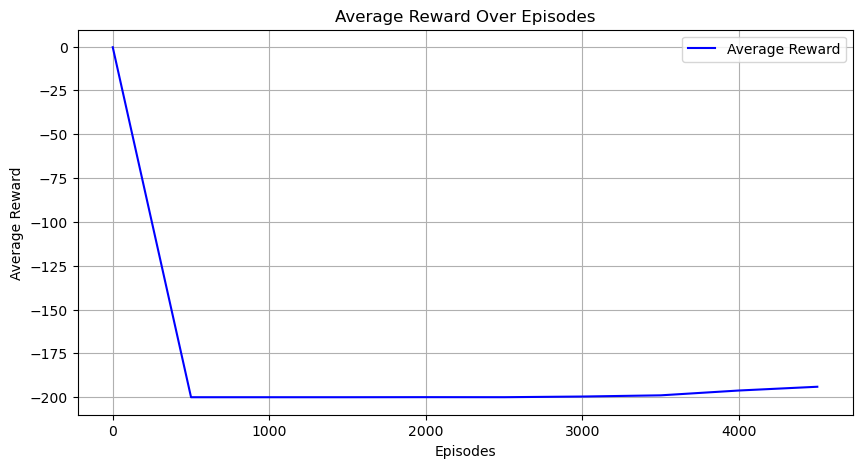

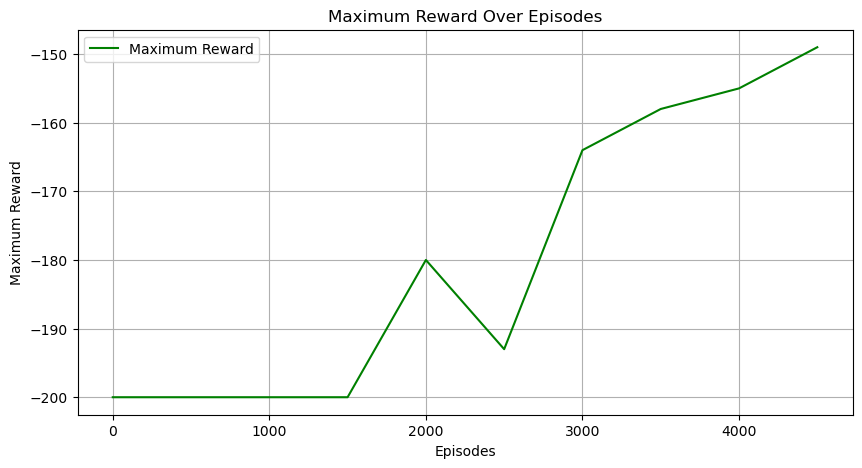

In [3]:
# Plot 1: Average Reward Over Episodes
plt.figure(figsize=(10, 5))
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="Average Reward", color="blue")
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward Over Episodes')
plt.legend()
plt.grid()
plt.show()

# Plot 2: Maximum Reward Over Episodes
plt.figure(figsize=(10, 5))
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="Maximum Reward", color="green")
plt.xlabel('Episodes')
plt.ylabel('Maximum Reward')
plt.title('Maximum Reward Over Episodes')
plt.legend()
plt.grid()
plt.show()

# Analysis of graphs 

# Graph 1: Average Reward Over Episodes

The average reward obtained by the agent over a sliding window of episodes.

**Interpretation:**

Initially, the average reward is close to -200, indicating that the agent fails to reach the goal.

Over time, the average reward increases, showing that the agent is learning to solve the problem.

By around 2000 episodes, the average reward stabilizes, suggesting that the agent has converged to a near-optimal policy.

The final average reward is around -150, meaning the agent is still not consistently reaching the goal but is performing better than random exploration. it should be noted that the agent is reaching the goal but not consistently. we can improve further by fine tuning and increasing the number of episodes which again increases the runtime 



# Graph 2: Maximum Reward Over Episodes

The maximum reward achieved in each episode.

**Interpretation:**

Initially, the maximum reward is close to -200, indicating that the agent rarely reaches the goal.

Over time, the maximum reward improves, reaching around -150 by the end of training.

This improvement shows that the agent is occasionally achieving better results, but it is still not consistently reaching the goal.

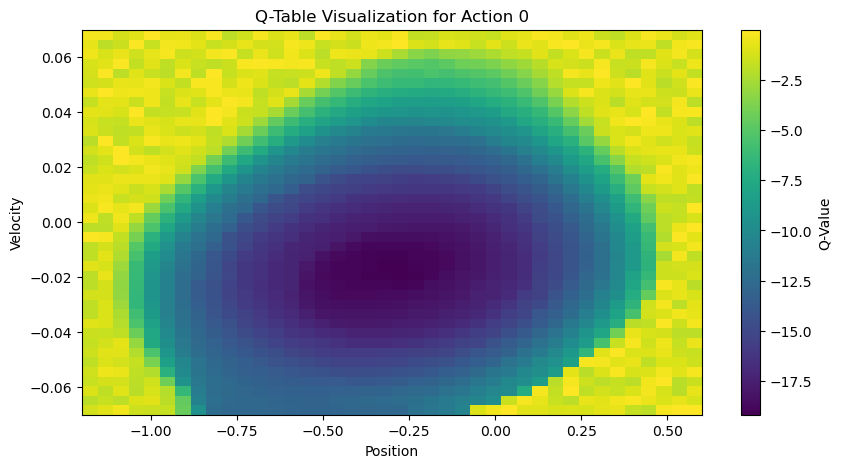

In [4]:
# Plot 3: Q-Table Visualization
# Extract Q-values for a specific action (e.g., action 0)
action_to_visualize = 0
q_values = q_table[:, :, action_to_visualize]

plt.figure(figsize=(10, 5))
plt.imshow(q_values, cmap="viridis", origin="lower", aspect="auto", 
           extent=[env.observation_space.low[0], env.observation_space.high[0], 
                   env.observation_space.low[1], env.observation_space.high[1]])
plt.colorbar(label="Q-Value")
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title(f'Q-Table Visualization for Action {action_to_visualize}')
plt.show()

# Q Graph 

It Represents the car's position in the environment (X-axis) and car's velocity, ranging from negative values (moving left) to positive values (moving right) (Y -axis).

- The color represents the Q-value for Action 0 (e.g., pushing left) at each state.

- Darker colors (e.g., blue) indicate lower Q-values (poorer actions).

- Lighter colors (e.g., yellow) indicate higher Q-values (better actions).


**Interpretation:**

1. Darker regions corresponding to lower Q value, These regions correspond to states where Action 0 (pushing left) is not effective. 

For example when the car is on the right side of the valley (high position) and moving right (positive velocity), pushing left is counterproductive. When the car is stuck in the bottom of the valley (low position) with low velocity, pushing left does not help build momentum.

2. lighter regions corresponding to higher Q value, These regions correspond to states where Action 0 (pushing left) is effective.

For example when the car is on the left side of the valley (low position) and moving left (negative velocity), pushing left helps build momentum to eventually reach the goal.

3. When the car has high velocity (either left or right), pushing left can help maintain or increase momentum.

4. Transition Regions: In some regions, the Q-values are moderate, indicating that Action 0 is neither highly effective nor completely ineffective. These regions often correspond to states where the car is transitioning between building momentum and reaching the goal.


**Analysis**

- Effectiveness of Action 0: The graph shows that Action 0 is most effective when the car is on the left side of the valley and moving left.

- This makes sense because pushing left in these states helps the car build momentum to eventually climb the hill.

- In states where the car is on the right side of the valley or has low velocity, Action 0 is less effective.

This highlights the difficulty of the Mountain Car problem, where the agent must learn to balance actions to build momentum.


**Learning Progress:**

The Q-values reflect the agent's learning progress. Over time, the agent has learned to associate certain states with higher Q-values for Action 0.

However, the agent still struggles in some regions, indicating that further training or tuning may be needed.



# Visualize the result (screenshot of car)

Below is a screenshot of the car reaching the goal during one of the episodes:


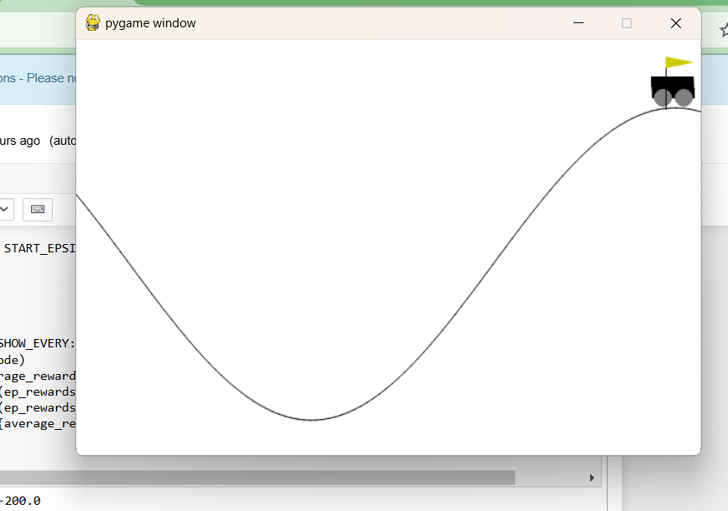

In [6]:
# Visualize the result (screenshot of car)

from IPython.display import Image, display

# Display an image
print("Below is a screenshot of the car reaching the goal during one of the episodes:")
display(Image("F:/Balaram/ML course/Mountain climb.png"))


# Challenges Faced by the Agent

**1.Sparse Rewards:** 

The agent receives a reward of -1 for every time step until it reaches the goal.

This makes it difficult for the agent to learn, as it only receives positive feedback when it reaches the goal.


**2. Difficulty Building Momentum:**

The car's engine is not powerful enough to climb the hill in a single pass.

The agent must learn to move back and forth to build enough momentum to reach the goal.


**3. Exploration vs. Exploitation:**

Balancing exploration and exploitation is challenging, especially in the early stages of training when the agent knows little about the environment.

# Summary and Conclusions

# Summary

The agent starts with poor performance, often failing to reach the goal.

Over time, the agent learns to build momentum and occasionally reaches the goal.

The average reward increases, indicating that the agent is learning to solve the problem.

The maximum reward also improves, but the agent is still not consistently reaching the goal.

# Conclusions

The agent successfully learns to improve its performance in the Mountain Car environment using Q-Learning.

However, the agent does not consistently reach the goal, suggesting that further tuning or more advanced algorithms (e.g., Deep Q-Learning) may be needed.

The results demonstrate the effectiveness of Q-Learning for solving reinforcement learning problems like the Mountain Car, but they also highlight the challenges of learning in environments with sparse rewards.

# Recommendations for Improvement

1. Increase Training Episodes: Train the agent for more episodes to allow it to explore the environment further and improve its policy. (How ever time intensive)

2. Tune Hyperparameters: Adjust the learning rate, discount factor, and exploration rate to improve learning efficiency.

3. Use Advanced Algorithms: Consider using Deep Q-Learning (DQN) or other advanced reinforcement learning algorithms to handle the sparse reward problem more effectively.

4. Improve State Discretization: Use a finer discretization of the state space to allow the agent to learn more precise policies.

All these things can improve the model but increases the learning time, we can  also improve the learning by using techniques such as transfer learning, deep q-learning and reward shaping etc. 